In [24]:
import pandas as pd
import numpy as np

# Dataset'i yükle
df = pd.read_csv("diabetes_2.csv")

print("Veri boyutu:", df.shape)
df.head()


Veri boyutu: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [27]:
y = df["Outcome"]
X = df.drop(columns=["Outcome"])


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np


kernel = C(1.0) * RBF(1.0)
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-2, normalize_y=True)
gpr.fit(X_train_scaled, y_train)


,kernel,1**2 * RBF(length_scale=1)
,alpha,0.01
,optimizer,'fmin_l_bfgs_b'
,n_restarts_optimizer,0
,normalize_y,True
,copy_X_train,True
,n_targets,None
,random_state,None
,kernel__k1,1**2
,kernel__k2,RBF(length_scale=1)
,kernel__k1__constant_value,1.0


In [43]:
# Tahmin
y_pred, y_std = gpr.predict(X_test_scaled, return_std=True)

# Varsayılan threshold 0.5
y_pred_class = (y_pred > 0.4).astype(int)

print("ACC:", accuracy_score(y_test, y_pred_class))
print("F1 :", f1_score(y_test, y_pred_class))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

ACC: 0.6818181818181818
F1 : 0.4842105263157895
ROC-AUC: 0.6988888888888889


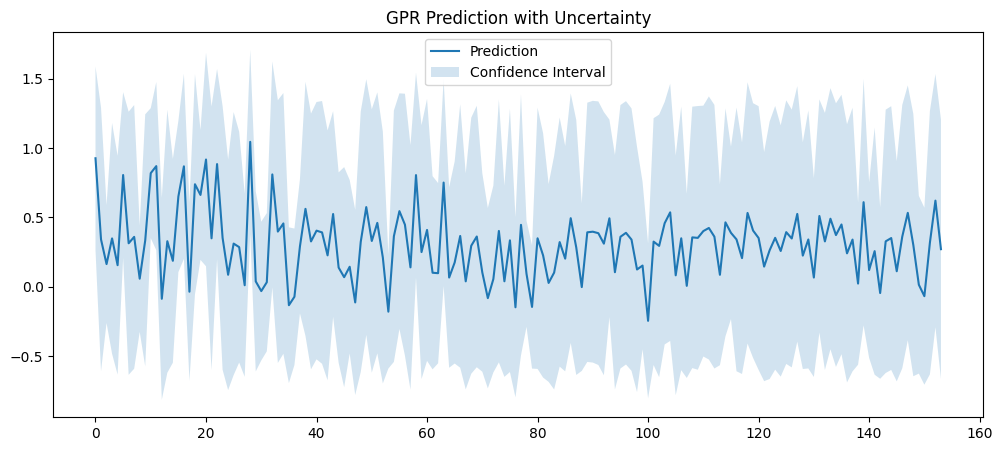

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_pred, label="Prediction")
plt.fill_between(
    range(len(y_pred)),
    y_pred - 1.96 * y_std,
    y_pred + 1.96 * y_std,
    alpha=0.2, label="Confidence Interval"
)
plt.title("GPR Prediction with Uncertainty")
plt.legend()
plt.savefig("GPR_Prediction_2.png")
plt.show()


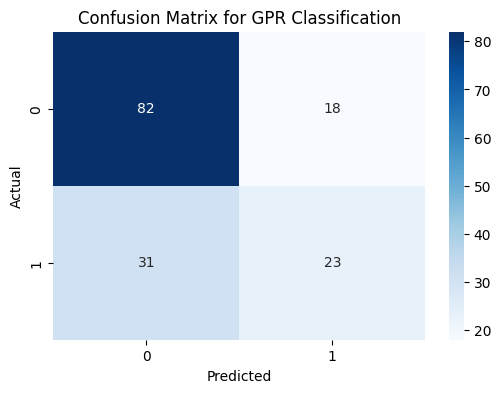

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GPR Classification")
plt.savefig("ConfusionMatrix_2.png")
plt.show()


In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.6, 11)
f1_scores = []

for thr in thresholds:
    y_thr = (y_pred > thr).astype(int)
    f1_scores.append(f1_score(y_test, y_thr))

df_thr = pd.DataFrame({
    "Threshold": thresholds,
    "F1 Score": f1_scores
})

df_thr


,Threshold,F1 Score
0,0.10,0.582857
1,0.15,0.548780
2,0.20,0.553459
3,0.25,0.582781
4,0.30,0.567376
5,0.35,0.564103
6,0.40,0.484211
7,0.45,0.418605
8,0.50,0.329114
9,0.55,0.250000


In [47]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.linspace(0.1, 0.5, 9)
for thr in thresholds:
    print(thr, f1_score(y_test, (y_pred > thr).astype(int)))


0.1 0.5828571428571429
0.15000000000000002 0.5487804878048781
0.2 0.5534591194968553
0.25 0.5827814569536424
0.30000000000000004 0.5673758865248227
0.35 0.5641025641025641
0.4 0.4842105263157895
0.45000000000000007 0.4186046511627907
0.5 0.3291139240506329
